# EDA:

In this notebook I will explore the data to understand relationships that can inform feature engineering and modeling.

In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from math import ceil

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.decomposition import PCA

## COMBINE DATASETS

#### Executive Compensation

In [59]:
# import compensation dataset that I have cleaned & reduced in the  prior notebook
comp = pd.read_csv('02.data/exec_dir/executive_comp_features.csv', index_col='ein')

In [61]:
comp.shape

(58543, 11)

In [62]:
comp.head()

,reportable_comp,subsection,state,formation_yr,assets,liabilities,expenses,revenue,state_median_income,ntee_categories,total_ex_comp_per_company
ein,,,,,,,,,,,
10945309,204012.0,501(c)(3),IN,2009,20015611,20848801.0,24155447.0,22357380.0,54181,Health,741963
10773281,65000.0,501(c)(3),IN,1978,183909,17785.0,167113.0,184148.0,54181,Education,65000
10798626,89400.0,501(c)(3),IN,2003,762680,51302.0,926549.0,857381.0,54181,"Arts, Culture, and Humanities",89400
20560511,68869.0,501(c)(3),IN,2001,197920,0.0,325719.0,309518.0,54181,Health,68869
10158948,90969.0,501(c)(7),IN,1874,10360714,5233813.0,4384964.0,4862977.0,54181,Human Services,161828


#### Governance Features

In [63]:
# import governance dataset that I have cleaned & reduced in the  prior notebook
gov = pd.read_csv('02.data/gov_features.csv', index_col='ein')

In [64]:
gov.head()

,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,ceo_comp_review,officer_comp_review,count_of_controls,gov_cluster_labels
ein,,,,,,,,,
996086871,2,0,0,0,140000,True,False,8,18
996078252,4,2,0,0,0,False,False,4,11
996064620,3,3,0,0,281890,True,True,11,161
996057064,3,3,0,3,0,False,False,4,11
996048710,3,3,0,0,104995,True,True,4,149


In [65]:
gov.shape

(269928, 9)

#### Join Datasets

In [66]:
# join together all features into one df

df = comp.merge(gov,
    left_index=True,
    right_index=True)

In [67]:
df.shape

(56029, 20)

In [68]:
# how many executive compensation payments 
# did not match up with data from 
# the governance dataset
comp.shape[0] - df.shape[0]

2514

In [69]:
round((comp.shape[0] - df.shape[0])/ \
comp.shape[0], 3)

0.043

At 3% this is quite small, and acceptable to me.

## EDA - UNIVARIATE

### Distribution of continuous features

In [70]:
df.select_dtypes(include=['int64', 'float64'])

,reportable_comp,formation_yr,assets,liabilities,expenses,revenue,state_median_income,total_ex_comp_per_company,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,count_of_controls,gov_cluster_labels
ein,,,,,,,,,,,,,,,
10021545,198085.0,1995,734264,650527.0,1608376.0,1638630.0,56277,198085,79,79,10,0,1052040,7,59
10024245,87550.0,1911,173021,89089.0,632341.0,603122.0,56277,87550,20,20,8,100,397835,10,4
10024645,64575.0,1896,2283338,49470.0,846299.0,941058.0,56277,64575,17,17,6,50,215850,8,33
10029480,62180.0,1927,17316,0.0,208615.0,183721.0,56277,62180,19,19,3,4,129714,9,44
10043280,130513.0,1952,831930,314175.0,1021331.0,1143753.0,56277,130513,31,31,9,145,539848,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996001264,259319.0,1959,35938780,8085639.0,25158903.0,26404357.0,77765,400493,24,23,749,786,14228447,10,4
996004506,95000.0,1962,18088190,22969.0,1568506.0,1669959.0,77765,95000,23,23,18,60,592636,6,17
996005407,184185.0,1976,17278847,676336.0,5819755.0,5171743.0,77765,453119,33,33,144,267,3009010,10,4


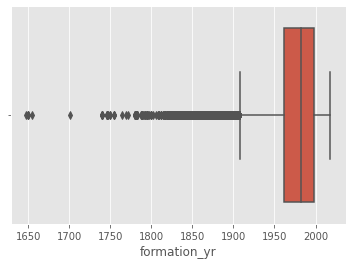

In [71]:
# distribution by year
sns.boxplot(df['formation_yr']);

Most not-for-profits are 30 - 40 years old.

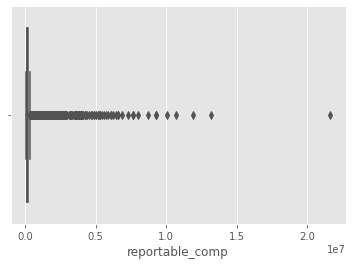

In [72]:
# distribution when excluding the top 10%
sns.boxplot(df['reportable_comp']);

In [73]:
# how many executives are paid over 1M?
df[df.reportable_comp > 1000000].shape[0]

604

In [74]:
# what percent of total does that make up?
round(df[df.reportable_comp > 1000000].shape[0] / df.shape[0], 2)

0.01

In [75]:
# because of how small this amount is
# and the potential to skew my model
# will exclude these executives from my analysis
df.drop(df[df.reportable_comp > 1000000].index, inplace=True)

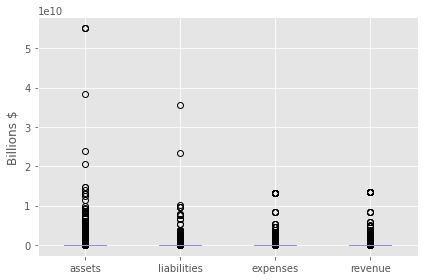

In [76]:
# examine distribution of financial data
df[['assets',
    'liabilities',
    'expenses',
    'revenue']].boxplot()
# plt.xlabel('Salary $')
plt.ylabel('Billions $')
plt.tight_layout()
# plt.savefig('03.visualizations/cont_features1.png');

### Remove outliers for visualization

In [77]:
df.select_dtypes(include=['int64', 'float64'])

,reportable_comp,formation_yr,assets,liabilities,expenses,revenue,state_median_income,total_ex_comp_per_company,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,count_of_controls,gov_cluster_labels
ein,,,,,,,,,,,,,,,
10021545,198085.0,1995,734264,650527.0,1608376.0,1638630.0,56277,198085,79,79,10,0,1052040,7,59
10024245,87550.0,1911,173021,89089.0,632341.0,603122.0,56277,87550,20,20,8,100,397835,10,4
10024645,64575.0,1896,2283338,49470.0,846299.0,941058.0,56277,64575,17,17,6,50,215850,8,33
10029480,62180.0,1927,17316,0.0,208615.0,183721.0,56277,62180,19,19,3,4,129714,9,44
10043280,130513.0,1952,831930,314175.0,1021331.0,1143753.0,56277,130513,31,31,9,145,539848,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996001264,259319.0,1959,35938780,8085639.0,25158903.0,26404357.0,77765,400493,24,23,749,786,14228447,10,4
996004506,95000.0,1962,18088190,22969.0,1568506.0,1669959.0,77765,95000,23,23,18,60,592636,6,17
996005407,184185.0,1976,17278847,676336.0,5819755.0,5171743.0,77765,453119,33,33,144,267,3009010,10,4


In [78]:
# trim outliers to examine continuous 
# features more closely

df_eda = df.select_dtypes(include=['int64', 'float64'])

In [79]:
# trim at 90th percentile
for column in df.select_dtypes(include=['int64', 'float64']):
    df_eda[column].clip(upper=df_eda[column].quantile(.95), inplace=True)

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:7415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


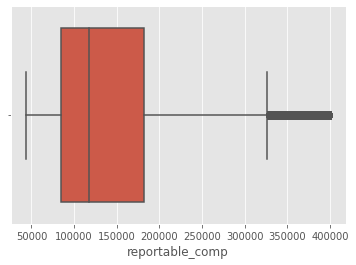

In [80]:
# distribution when excluding the top 10%
sns.boxplot(df_eda['reportable_comp']);

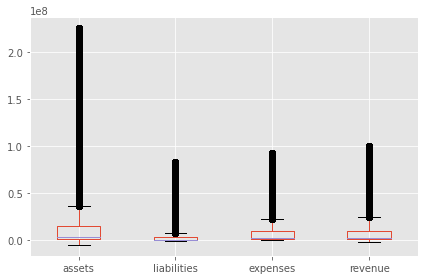

In [81]:
# examine distribution of financial data
df_eda[['assets',
    'liabilities',
    'expenses',
    'revenue']].boxplot()

# plt.ylabel('Billions $')
plt.tight_layout()
# plt.savefig('03.visualizations/cont_features2.png');

The strongest disparity in organizations seems to be in assets.  This makes sense since some organizations such as a hospital will have a huge amount of assets, while other organizations focused on advocacy will have fewer assets.

### NTEE type analysis

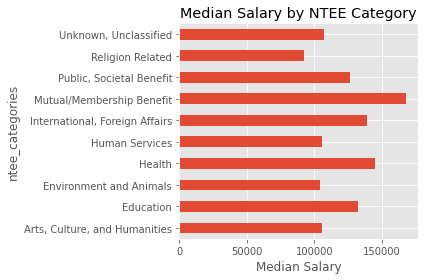

In [82]:
# fig, ax = plt.subplots(figsize=(6, 6))

df.groupby('ntee_categories')['reportable_comp'].agg(['median']).plot(kind='barh', legend=False)

plt.xlabel('Median Salary')
plt.title('Median Salary by NTEE Category')
plt.tight_layout()
# plt.savefig('03.visualizations/NTEE_median_salary.png');

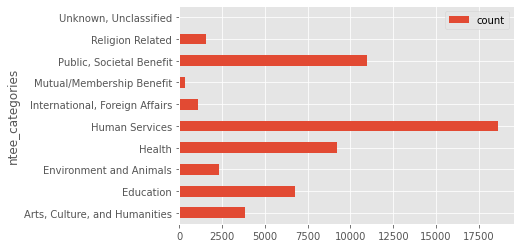

In [83]:
df.groupby('ntee_categories')['reportable_comp'].agg(['count']).plot(kind='barh')

### 501(c) type analysis

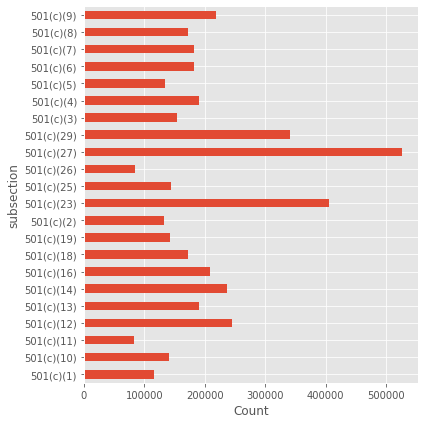

In [84]:
# based on not-for-profit type, which executives receive the highest compensation?
fig, ax = plt.subplots(figsize=(6, 6))


df.groupby('subsection')['reportable_comp'].agg(['mean']).plot(ax=ax, kind='barh', legend=False)
plt.xlabel('Count')
plt.tight_layout()

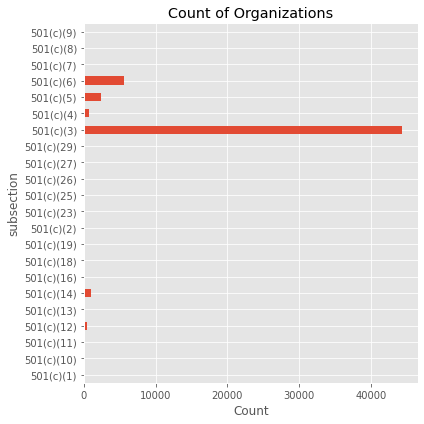

In [85]:
# count distribution by not-for-profit type?
fig, ax = plt.subplots(figsize=(6, 6))

df.groupby('subsection')['reportable_comp'].agg(['count']).plot(ax=ax, kind='barh', legend=False)
plt.xlabel('Count')
plt.title('Count of Organizations')
plt.tight_layout()
# plt.savefig('03.visualizations/501_dist.png');

501(c)(3) has the highest number of organizations by a lot.  Because of the small count of organizations within some subsections, I may want to consolidate all but the largest.

### Distribution by State

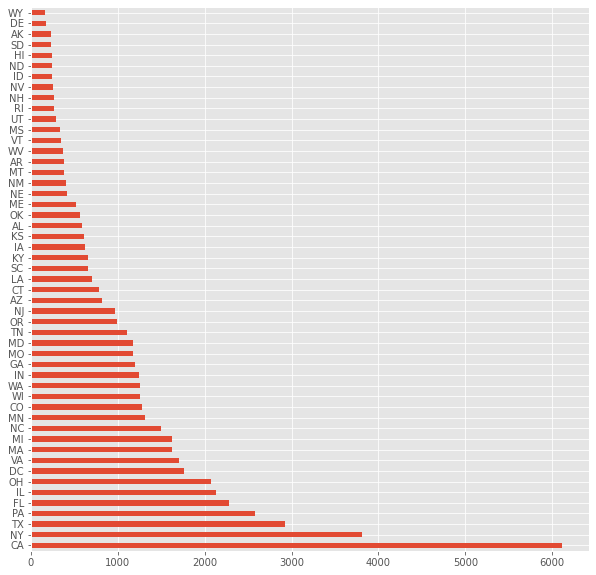

In [86]:
# how are not-for-profits distributed by state?
df.state.value_counts().plot(kind='barh', figsize=(10, 10));

This distribution is about what I would expect based on the population sizes of the states.

## EDA - MULTIVARIATE

In [87]:
df.select_dtypes(include=[np.number])

,reportable_comp,formation_yr,assets,liabilities,expenses,revenue,state_median_income,total_ex_comp_per_company,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,count_of_controls,gov_cluster_labels
ein,,,,,,,,,,,,,,,
10021545,198085.0,1995,734264,650527.0,1608376.0,1638630.0,56277,198085,79,79,10,0,1052040,7,59
10024245,87550.0,1911,173021,89089.0,632341.0,603122.0,56277,87550,20,20,8,100,397835,10,4
10024645,64575.0,1896,2283338,49470.0,846299.0,941058.0,56277,64575,17,17,6,50,215850,8,33
10029480,62180.0,1927,17316,0.0,208615.0,183721.0,56277,62180,19,19,3,4,129714,9,44
10043280,130513.0,1952,831930,314175.0,1021331.0,1143753.0,56277,130513,31,31,9,145,539848,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996001264,259319.0,1959,35938780,8085639.0,25158903.0,26404357.0,77765,400493,24,23,749,786,14228447,10,4
996004506,95000.0,1962,18088190,22969.0,1568506.0,1669959.0,77765,95000,23,23,18,60,592636,6,17
996005407,184185.0,1976,17278847,676336.0,5819755.0,5171743.0,77765,453119,33,33,144,267,3009010,10,4


In [88]:
# examine the correlation of numeric features
df.select_dtypes(include=[np.number]).corr().loc[:, 'reportable_comp'].sort_values(ascending=False)

reportable_comp               1.000000
total_ex_comp_per_company     0.446750
count_of_controls             0.322583
employee_tot_ct               0.259218
assets                        0.234659
revenue                       0.227435
salaries_expense_tot_curyr    0.222033
expenses                      0.221079
liabilities                   0.216484
state_median_income           0.153858
voting_indepmemb_ct           0.025256
voting_memb_ct                0.023795
volunteer_tot_ct              0.021753
gov_cluster_labels            0.011008
formation_yr                 -0.208310
Name: reportable_comp, dtype: float64

(15.5, -0.5)

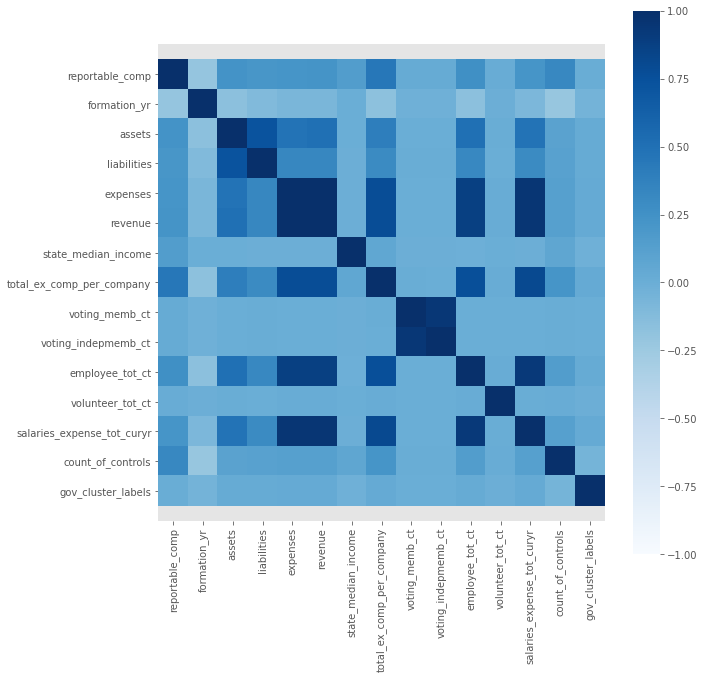

In [89]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(df.select_dtypes(include=[np.number]).corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=False, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Interaction between subsection category and NTEE category

In [90]:
df.head()

,reportable_comp,subsection,state,formation_yr,assets,liabilities,expenses,revenue,state_median_income,ntee_categories,total_ex_comp_per_company,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,ceo_comp_review,officer_comp_review,count_of_controls,gov_cluster_labels
ein,,,,,,,,,,,,,,,,,,,,
10021545,198085.0,501(c)(6),ME,1995,734264,650527.0,1608376.0,1638630.0,56277,"Public, Societal Benefit",198085,79,79,10,0,1052040,False,False,7,59
10024245,87550.0,501(c)(6),ME,1911,173021,89089.0,632341.0,603122.0,56277,"Public, Societal Benefit",87550,20,20,8,100,397835,True,True,10,4
10024645,64575.0,501(c)(3),ME,1896,2283338,49470.0,846299.0,941058.0,56277,"Arts, Culture, and Humanities",64575,17,17,6,50,215850,True,True,8,33
10029480,62180.0,501(c)(6),ME,1927,17316,0.0,208615.0,183721.0,56277,"Public, Societal Benefit",62180,19,19,3,4,129714,True,True,9,44
10043280,130513.0,501(c)(6),ME,1952,831930,314175.0,1021331.0,1143753.0,56277,"Public, Societal Benefit",130513,31,31,9,145,539848,True,True,12,16


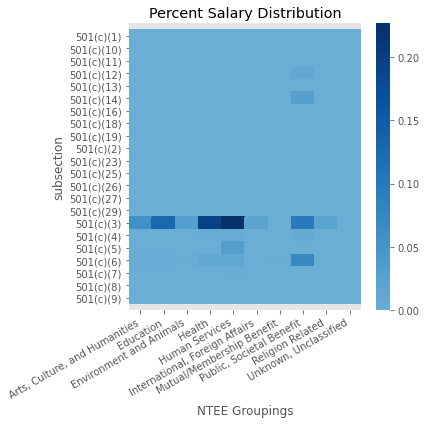

In [91]:
# compare features using a heatmap
plt.figure(figsize=(6, 6))

ax = sns.heatmap(pd.crosstab(df.subsection, df.ntee_categories, values=df.reportable_comp, aggfunc='sum', normalize=True), 
                 center=0, 
                 square=False, annot=False, 
                 cmap='Blues')

plt.xticks(rotation=30, horizontalalignment="right")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('NTEE Groupings')
plt.title('Percent Salary Distribution')
plt.tight_layout()
# plt.savefig('03.visualizations/501_heatmap.png');

In [92]:
df.head()

,reportable_comp,subsection,state,formation_yr,assets,liabilities,expenses,revenue,state_median_income,ntee_categories,total_ex_comp_per_company,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,ceo_comp_review,officer_comp_review,count_of_controls,gov_cluster_labels
ein,,,,,,,,,,,,,,,,,,,,
10021545,198085.0,501(c)(6),ME,1995,734264,650527.0,1608376.0,1638630.0,56277,"Public, Societal Benefit",198085,79,79,10,0,1052040,False,False,7,59
10024245,87550.0,501(c)(6),ME,1911,173021,89089.0,632341.0,603122.0,56277,"Public, Societal Benefit",87550,20,20,8,100,397835,True,True,10,4
10024645,64575.0,501(c)(3),ME,1896,2283338,49470.0,846299.0,941058.0,56277,"Arts, Culture, and Humanities",64575,17,17,6,50,215850,True,True,8,33
10029480,62180.0,501(c)(6),ME,1927,17316,0.0,208615.0,183721.0,56277,"Public, Societal Benefit",62180,19,19,3,4,129714,True,True,9,44
10043280,130513.0,501(c)(6),ME,1952,831930,314175.0,1021331.0,1143753.0,56277,"Public, Societal Benefit",130513,31,31,9,145,539848,True,True,12,16


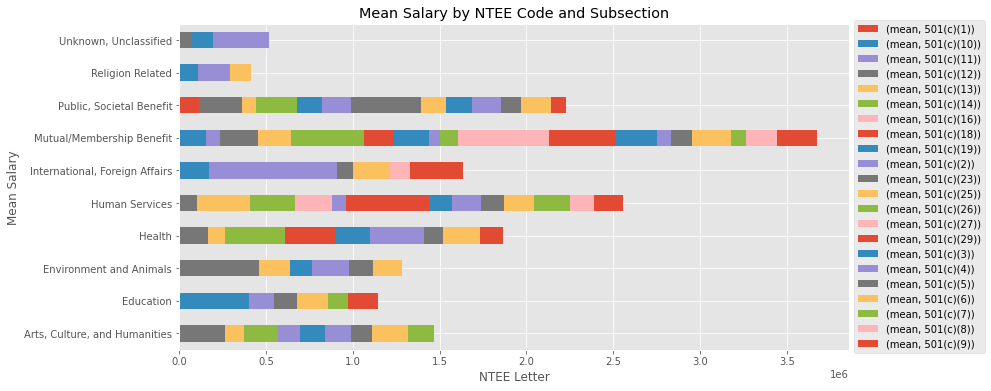

In [93]:
# examine distribution by NTEE and subsection
fig, ax = plt.subplots(figsize=(12, 6))

df.groupby(['ntee_categories', 'subsection'])['reportable_comp'].agg(['mean']) \
    .unstack().plot(ax=ax, kind='barh', stacked=True)

plt.title('Mean Salary by NTEE Code and Subsection')
plt.ylabel('Mean Salary')
plt.xlabel('NTEE Letter')

plt.legend(loc='center left', bbox_to_anchor=(1.0, .5), fontsize=10);

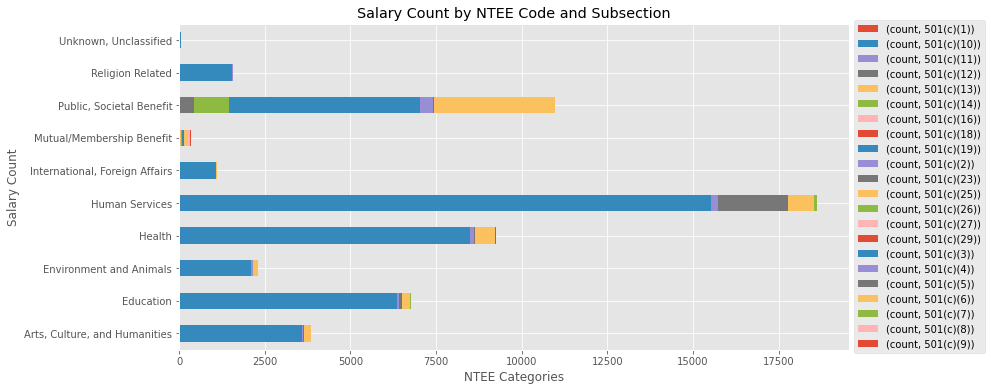

In [94]:
# examine distribution by NTEE and subsection
fig, ax = plt.subplots(figsize=(12, 6))

df.groupby(['ntee_categories', 'subsection'])['reportable_comp'].agg(['count']) \
    .unstack().plot(ax=ax, kind='barh', stacked=True)

plt.title('Salary Count by NTEE Code and Subsection')
plt.ylabel('Salary Count')
plt.xlabel('NTEE Categories')

plt.legend(loc='center left', bbox_to_anchor=(1.0, .5), fontsize=10);

By and large 501(c)(3) dominates.  However:
1. NTEE letter J (Employment) has a larger share of 501(c)(5) - Labor and Agricultural Organizations
1. NTEE letter N (Recreation & Sports) has a large share of 501(c)(7) - "organized for pleasure,
recreation, and other nonprofitable purposes."
1. NTEE letter S (Community Improvement & Capacity Building) has a large share of 501(c)(6) - chamber of commerce
1. NTEE letter W (Public & Societal Benefit) has a larger share of:
 1. 501(c)(12) - "benevolent life insurance associations of a purely local character and like organizations, mutual ditch or irrigation companies and like organizations [and] mutual or cooperative telephone companies and like organizations."
 1. 501(c)(14) - State chartered credit unions

There is more imbalance in subsection distribution than there is in NTEE categories.  Just because an organization has a specific cause doesn't seem to completely control the subsection it is assigned to.

### Interaction between continuous features

In [95]:
df_eda.select_dtypes(include=[np.number]).columns

Index(['reportable_comp', 'formation_yr', 'assets', 'liabilities', 'expenses',
       'revenue', 'state_median_income', 'total_ex_comp_per_company',
       'voting_memb_ct', 'voting_indepmemb_ct', 'employee_tot_ct',
       'volunteer_tot_ct', 'salaries_expense_tot_curyr', 'count_of_controls',
       'gov_cluster_labels'],
      dtype='object')

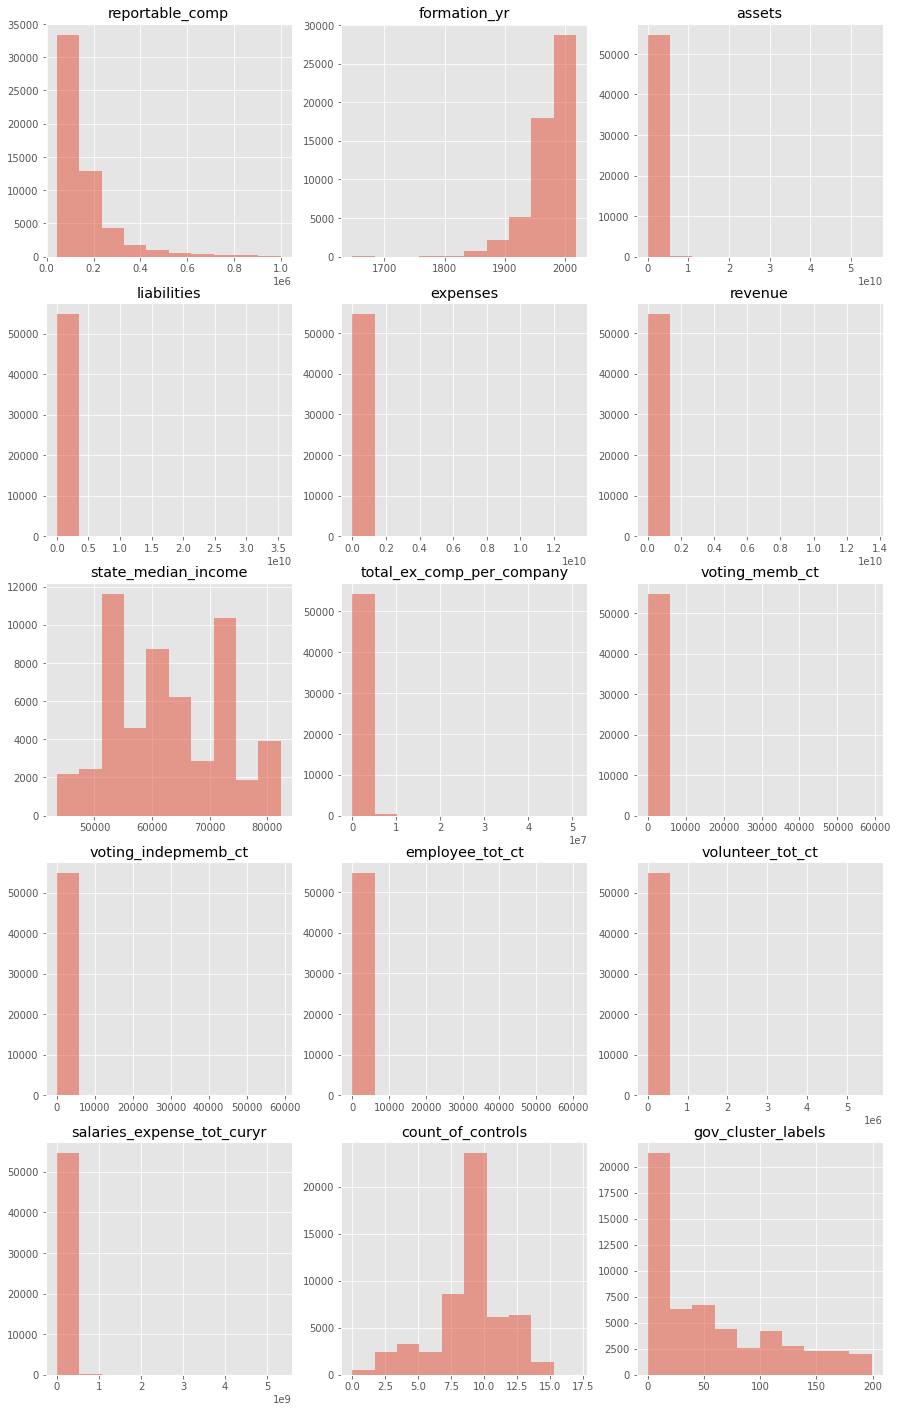

In [96]:
fig = plt.figure(figsize=(15, 30))

for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(ceil(len(df.columns[3:])/3), 3, i+1)
    plt.title(column)
    plt.hist(df[column], alpha=.5);

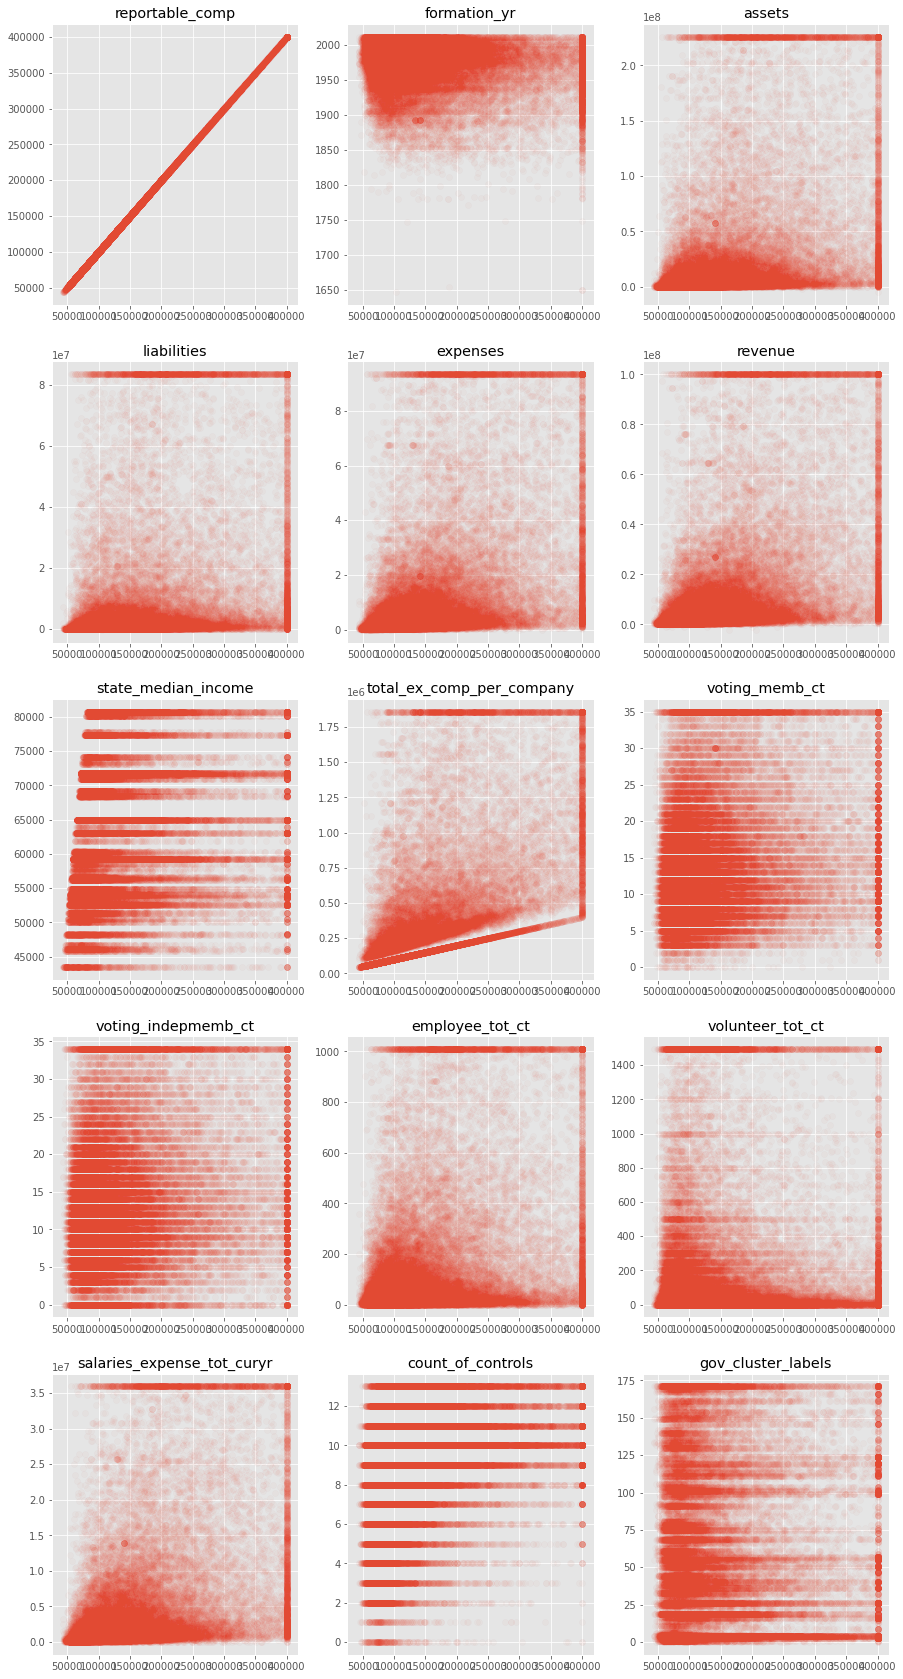

In [97]:
fig = plt.figure(figsize=(15, 30))

for i, column in enumerate(df_eda.select_dtypes(include=[np.number]).columns):
    plt.subplot(ceil(len(df_eda.select_dtypes(include=[np.number]).columns)/3), 3, i+1)
    plt.title(column)
    plt.scatter(df_eda['reportable_comp'], df_eda[column], alpha=.03);

Text(0.5, 68.99999999999991, 'Executive Compensation')

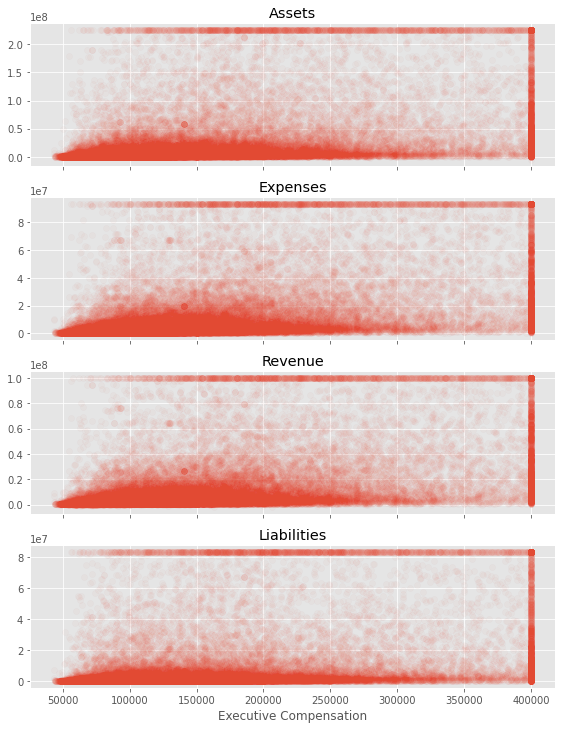

In [98]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 10))

ax[0].scatter(df_eda['reportable_comp'], df_eda['assets'], alpha=.03)
ax[0].set_title('Assets')

ax[1].scatter(df_eda['reportable_comp'], df_eda['expenses'], alpha=.03)
ax[1].set_title('Expenses')

ax[2].scatter(df_eda['reportable_comp'], df_eda['revenue'], alpha=.03)
ax[2].set_title('Revenue')

ax[3].scatter(df_eda['reportable_comp'], df_eda['liabilities'], alpha=.03)
ax[3].set_title('Liabilities')

plt.tight_layout()
plt.xlabel('Executive Compensation')
# plt.savefig('03.visualizations/fin_scatterplots.png');

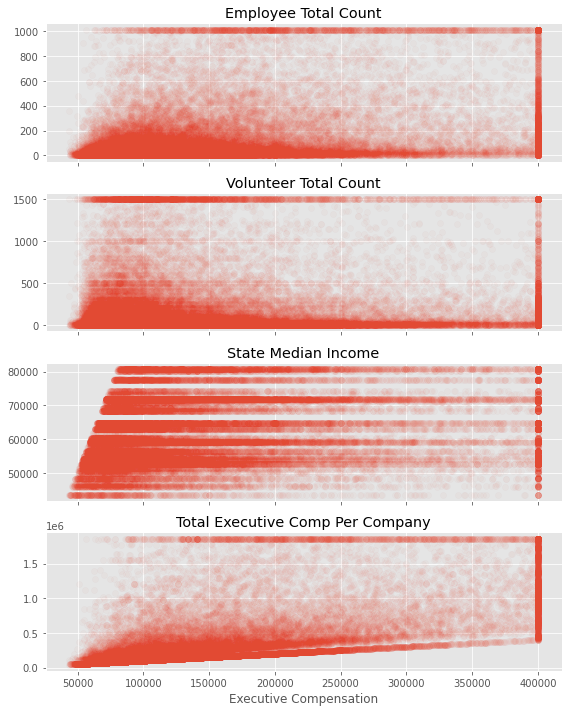

In [99]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 10))

ax[0].scatter(df_eda['reportable_comp'], df_eda['employee_tot_ct'], alpha=.03)
ax[0].set_title('Employee Total Count')

ax[1].scatter(df_eda['reportable_comp'], df_eda['volunteer_tot_ct'], alpha=.03)
ax[1].set_title('Volunteer Total Count')

ax[2].scatter(df_eda['reportable_comp'], df_eda['state_median_income'], alpha=.03)
ax[2].set_title('State Median Income')

ax[3].scatter(df_eda['reportable_comp'], df_eda['total_ex_comp_per_company'], alpha=.03)
ax[3].set_title('Total Executive Comp Per Company');

plt.xlabel('Executive Compensation')
plt.tight_layout()
# plt.savefig('03.visualizations/fin_scatterplots.png');

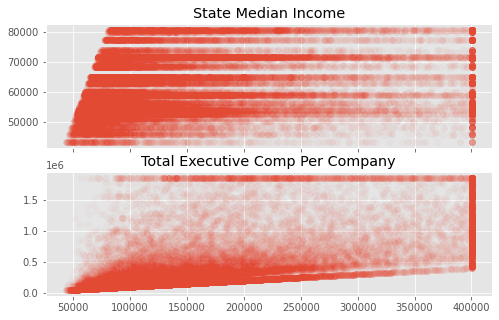

In [100]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 5))

ax[0].scatter(df_eda['reportable_comp'], df_eda['state_median_income'], alpha=.03)
ax[0].set_title('State Median Income')

ax[1].scatter(df_eda['reportable_comp'], df_eda['total_ex_comp_per_company'], alpha=.03)
ax[1].set_title('Total Executive Comp Per Company');


### Interaction between salaries and assets, liabilities, expenses, revenue and the purpose of the not-for-profit.

In [101]:
# cat_subset = pd.concat([
#     df_eda[['reportable_comp',
#         'assets',
#         'liabilities',
#         'expenses',
#         'revenue',
#         'total_ex_comp_per_company',
#         'salaries_expense_tot_curyr']],
#     df.ntee_categories
# ], axis=1)

#### Human Services

In [102]:
# fig = plt.figure(figsize=(15, 15))

# for i, column in enumerate(cat_subset.select_dtypes(include=[np.number]).columns):
#     plt.subplot(ceil(len(cat_subset.select_dtypes(include=[np.number]).columns)/3), 3, i+1)
#     plt.title(column)
#     plt.scatter(cat_subset.loc[cat_subset.ntee_categories == 'Human Services', 'reportable_comp'],
#                 cat_subset.loc[cat_subset.ntee_categories == 'Human Services', column], alpha=.03);

In [103]:
# fig = plt.figure(figsize=(15, 15))

# for i, column in enumerate(cat_subset.select_dtypes(include=[np.number]).columns):
#     plt.subplot(ceil(len(cat_subset.select_dtypes(include=[np.number]).columns)/3), 3, i+1)
#     plt.title(column)
#     plt.scatter(cat_subset.loc[cat_subset.ntee_categories == 'Health', 'reportable_comp'],
#                 cat_subset.loc[cat_subset.ntee_categories == 'Health', column], alpha=.03);

In [104]:
# fig = plt.figure(figsize=(15, 15))

# for i, column in enumerate(cat_subset.select_dtypes(include=[np.number]).columns):
#     plt.subplot(ceil(len(cat_subset.select_dtypes(include=[np.number]).columns)/3), 3, i+1)
#     plt.title(column)
#     plt.scatter(cat_subset.loc[cat_subset.ntee_categories == 'Public, Societal Benefit', 'reportable_comp'],
#                 cat_subset.loc[cat_subset.ntee_categories == 'Public, Societal Benefit', column], alpha=.03);

In [105]:
# fig = plt.figure(figsize=(15, 15))

# for i, column in enumerate(cat_subset.select_dtypes(include=[np.number]).columns):
#     plt.subplot(ceil(len(cat_subset.select_dtypes(include=[np.number]).columns)/3), 3, i+1)
#     plt.title(column)
#     plt.scatter(cat_subset.loc[cat_subset.ntee_categories == 'Education', 'reportable_comp'],
#                 cat_subset.loc[cat_subset.ntee_categories == 'Education', column], alpha=.03);

The high number of categories and datapoints makes none of these visuals very informative.

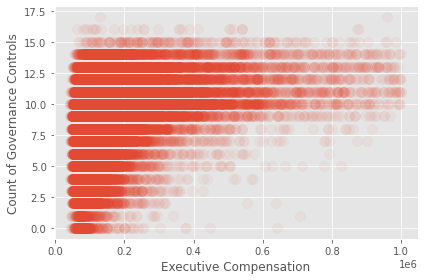

In [106]:
# examine the relationship between 
# governance controls and executive compensation
plt.scatter(df['reportable_comp'], df['count_of_controls'], alpha=.05, s=100)
plt.xlabel('Executive Compensation')
plt.ylabel('Count of Governance Controls')
plt.tight_layout()

# plt.savefig('03.visualizations/controls_vs_salary.png');

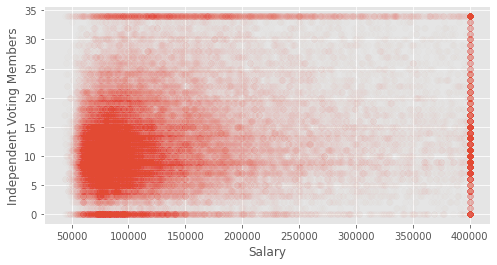

In [107]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(df_eda['reportable_comp'], df_eda['voting_indepmemb_ct'], alpha=.01)
plt.xlabel('Salary')
plt.ylabel('Independent Voting Members');

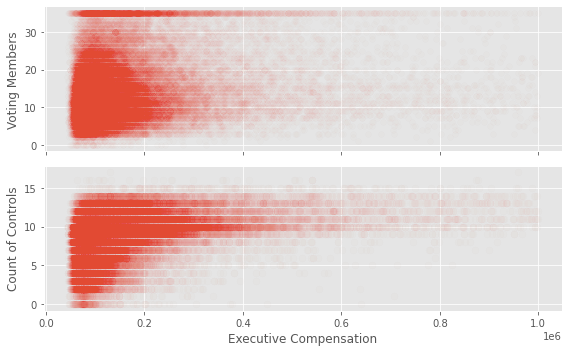

In [108]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 5))

ax[0].scatter(df['reportable_comp'], df_eda['voting_memb_ct'], alpha=.01)
ax[0].set_ylabel('Voting Members')

ax[1].scatter(df['reportable_comp'], df['count_of_controls'], alpha=.01, s=50)
ax[1].set_ylabel('Count of Controls')
ax[1].set_xlabel('Executive Compensation')

plt.tight_layout()
# plt.savefig('03.visualizations/controls_vs_salary.png');

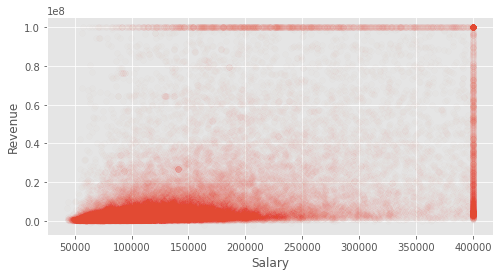

In [109]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(df_eda['reportable_comp'], df_eda['revenue'], alpha=.01)
plt.xlabel('Salary')
plt.ylabel('Revenue');

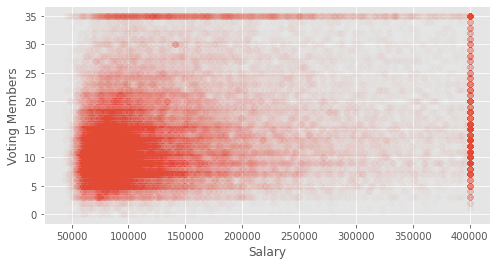

In [110]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(df_eda['reportable_comp'], df_eda['voting_memb_ct'], alpha=.01)
plt.xlabel('Salary')
plt.ylabel('Voting Members');

### EXPORT DATASET FOR MODELING

In [111]:
df.head()

,reportable_comp,subsection,state,formation_yr,assets,liabilities,expenses,revenue,state_median_income,ntee_categories,total_ex_comp_per_company,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,ceo_comp_review,officer_comp_review,count_of_controls,gov_cluster_labels
ein,,,,,,,,,,,,,,,,,,,,
10021545,198085.0,501(c)(6),ME,1995,734264,650527.0,1608376.0,1638630.0,56277,"Public, Societal Benefit",198085,79,79,10,0,1052040,False,False,7,59
10024245,87550.0,501(c)(6),ME,1911,173021,89089.0,632341.0,603122.0,56277,"Public, Societal Benefit",87550,20,20,8,100,397835,True,True,10,4
10024645,64575.0,501(c)(3),ME,1896,2283338,49470.0,846299.0,941058.0,56277,"Arts, Culture, and Humanities",64575,17,17,6,50,215850,True,True,8,33
10029480,62180.0,501(c)(6),ME,1927,17316,0.0,208615.0,183721.0,56277,"Public, Societal Benefit",62180,19,19,3,4,129714,True,True,9,44
10043280,130513.0,501(c)(6),ME,1952,831930,314175.0,1021331.0,1143753.0,56277,"Public, Societal Benefit",130513,31,31,9,145,539848,True,True,12,16


In [112]:
# remove target feature and 
# export features for modeling
df.to_csv('02.data/exec_dir/model_dataset.csv', index=False)